In [1]:
import pandas as pd

In [3]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [20]:
films = ratings.groupby(['movieId']).mean('rating')
films = films.drop({'userId', 'timestamp'}, axis = 1)
films = films.reset_index()
films.head()

,movieId,rating
0,1,3.872470
1,10,3.450820
2,100,3.428571
3,100017,3.000000
4,100032,2.000000


In [21]:
def clss(rating):
    if rating <= 2:
        return 'low'
    if 2 < rating <= 4:
        return 'medium'
    if rating >= 4:
        return 'high'
    return 'undefined'

films['class'] = films['rating'].apply(clss)
films.head()

,movieId,rating,class
0,1,3.872470,medium
1,10,3.450820,medium
2,100,3.428571,medium
3,100017,3.000000,medium
4,100032,2.000000,low


In [88]:
keywords = pd.read_csv('ml-latest-small/keywords.csv')
keywords['spl'] = keywords['keyword'].apply(str)
keywords['spl'] = keywords['spl'].apply(lambda k: k.split(' '))
#test = keywords.loc[127]
#type(test)

In [89]:
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

def region(keyword):
    for word in keyword:
        for region, cities in geo_data.items():
            if word in cities:
                return region
    return 'undefined'

#keywords['region'] = keywords['spl'].apply(region)
#keywords.head()

keywords['region'] = keywords['spl'].apply(region)
keywords.loc[127]

keyword       авито москва
shows               979292
spl        [авито, москва]
region               Центр
Name: 127, dtype: object

<AxesSubplot:xlabel='production_year'>

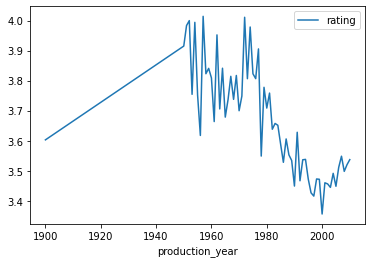

In [96]:
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

#years = list(range(1950, 2011))

def production_year(name):
    for y in list(range(1950, 2011)):
        if str(y) in name:
            return y
    return 1900

movies['production_year'] = movies['title'].apply(production_year)

movies_w_ratings = movies.merge(ratings, 'left', 'movieId')

#movies_w_ratings.head()

year_ratings = movies_w_ratings.groupby(['production_year']).mean('rating')
#year_ratings.head()
year_ratings = year_ratings.drop({'movieId', 'userId', 'timestamp'}, axis = 1)

year_ratings.plot()